In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/cooccurrence.csv')

In [2]:
df.drop(df.index[0], inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,A. Dippet,A. Kirke,A. Lynch,A. Pye,A. Sinistra,Aberforth D.,Abraxas M.,Adrian P.,Alastor M.,Albert R.,...,Whomping Willow,William S.,William the Pukwudgie,Winky,Xenophilius L.,Yaxley,Zacharias S.,Zacharias S.] Megan J.,Zhang Fei,Úrsula F.
A. Dippet,24,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A. Kirke,0,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Lynch,0,0,13,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Pye,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A. Sinistra,0,0,0,0,175,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df['Harry P.'].nlargest(10)['Harry P.']

151951

In [29]:
def already_related(character1, character2, relations):
    for relation in relations:
        if relation['character'] == character1 and relation['associate'] == character2:
            return True

In [30]:
relations = []
for character in df.keys():
    data = {'character' : character}
    most_associated = df[character].nlargest(10)
    for associate in most_associated.keys():
        if (associate!=character) and not already_related(associate, character, relations):
            relations.append({'character':character, 'associate':associate, 'count':most_associated[associate]})

In [31]:
relations.sort(key=lambda x: x['count'], reverse=True)

In [50]:
top_relations = relations[:15]

In [36]:
import pandas as pd

data_directory = '../data/'

# here is the corrected data
filename = "corrected_data.json"

# take the transpose so that the column names are the metadata keys, not the story ids
all_data = pd.read_json(data_directory + filename).transpose()

In [37]:
all_data.head()

,author_id,characters,genres,language,num_chapters,num_favs,num_follows,num_reviews,num_words,published,rated,status,title,updated
10000036,2846408,"[[Ron W., Hermione G.]]","[Romance, Humor]",English,1,5,2,3,5436,1389050085,T,Complete,Kilts and other adversities,1389050085
10000109,5232542,"[James P., Lily Evans P.]","[Humor, Romance]",English,1,4,NaN,2,747,1389051817,K+,Complete,Of Dead Puppies and Dropped Pianos,1389051817
10000111,5438139,[],[],Spanish,1,7,6,5,400,1389051884,K+,Incomplete,Querido primo Harry,1389051884
10000114,5437478,"[Hermione G., Draco M.]","[Romance, Humor]",Spanish,1,11,13,8,1757,1389051911,K+,Incomplete,Conciertos en Hogwarts,1389051911
10000137,4626918,"[Bellatrix L., Luna L.]","[Humor, Horror]",English,3,NaN,NaN,3,659,1389052244,T,Complete,Crazy songs from crazy people,1389414254


In [85]:
char_titles = all_data[all_data['language']=='English'][['characters','title']]
char_titles.head()

,characters,title
10000036,"[[Ron W., Hermione G.]]",Kilts and other adversities
10000109,"[James P., Lily Evans P.]",Of Dead Puppies and Dropped Pianos
10000137,"[Bellatrix L., Luna L.]",Crazy songs from crazy people
10000165,[],Never Going To Be Alone
1000018,[],Degenero


In [86]:
len(char_titles)

463992

In [87]:
def isListOfLists(obj):
    return any(isinstance(el, list) for el in obj)

In [88]:
def flatten_list(l):
    if isListOfLists(l):
        returnList = []
        for sublist in l:
            if isinstance(sublist, list):
                for item in sublist:
                    returnList.append(item)
            else:
                returnList.append(sublist)
        return returnList;
    else:
        return l

In [89]:
char_titles['characters']= char_titles['characters'].apply(lambda l: flatten_list(l))

In [90]:
char_titles.head()

,characters,title
10000036,"[Ron W., Hermione G.]",Kilts and other adversities
10000109,"[James P., Lily Evans P.]",Of Dead Puppies and Dropped Pianos
10000137,"[Bellatrix L., Luna L.]",Crazy songs from crazy people
10000165,[],Never Going To Be Alone
1000018,[],Degenero


In [91]:
def is_a_relation(characterArray, relations):
    for relation in relations:
        if relation['character'] in characterArray and relation['associate'] in characterArray:
            return True
    return False

print(is_a_relation(['Harry P.', 'Ron W.'], top_relations))
print(is_a_relation(['Harry P.', 'Sirius B.'], top_relations))
print(is_a_relation(['Harry P.', 'Sirius B.', 'Ron W.'], top_relations))

True
False
True


In [92]:
pairs = []
for relation in top_relations:
    pairs.append(char_titles[char_titles['characters'].apply(lambda x: is_a_relation(x, [relation]))])

In [77]:
top_relations

[{'associate': 'Hermione G.', 'character': 'Draco M.', 'count': 44837},
 {'associate': 'Harry P.', 'character': 'Draco M.', 'count': 34761},
 {'associate': 'Lily Evans P.', 'character': 'James P.', 'count': 33888},
 {'associate': 'Hermione G.', 'character': 'Harry P.', 'count': 27888},
 {'associate': 'Ron W.', 'character': 'Hermione G.', 'count': 26687},
 {'associate': 'Harry P.', 'character': 'Ginny W.', 'count': 22153},
 {'associate': 'Sirius B.', 'character': 'Remus L.', 'count': 17923},
 {'associate': 'Ginny W.', 'character': 'Draco M.', 'count': 12946},
 {'associate': 'Severus S.', 'character': 'Harry P.', 'count': 12273},
 {'associate': 'Severus S.', 'character': 'Hermione G.', 'count': 11213},
 {'associate': 'Ron W.', 'character': 'Harry P.', 'count': 9173},
 {'associate': 'Sirius B.', 'character': 'James P.', 'count': 8342},
 {'associate': 'Scorpius M.', 'character': 'Rose W.', 'count': 7893},
 {'associate': 'Severus S.', 'character': 'Lily Evans P.', 'count': 6619},
 {'associa

In [60]:
from wordcloud import WordCloud

In [93]:
text = pairs[0]['title'].str.cat(sep=',')
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

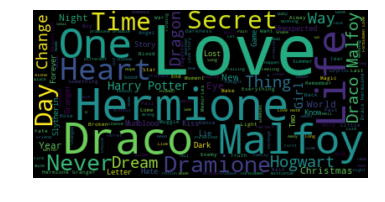

In [94]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

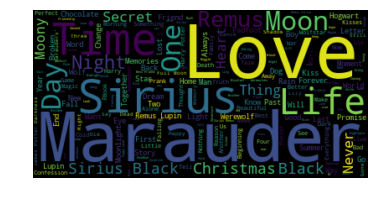

In [211]:
text = pairs[6]['title'].str.cat(sep=',')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

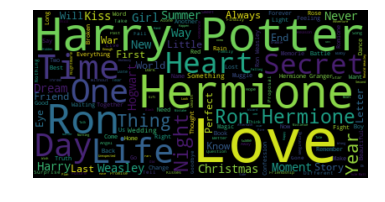

In [216]:
text = pairs[4]['title'].str.cat(sep=',')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

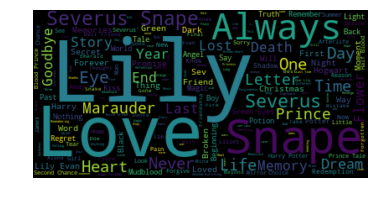

In [208]:
text = pairs[13]['title'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [103]:
texts = []
for pair in pairs:
    texts.append(pair['title'].str.cat(sep=' ').split(' '))

In [129]:
from wordcloud import STOPWORDS
more_stopwords = ['','&','-']

In [163]:
frequencies = []
for text in texts:
    freq = {}
    for word in text:
        if word.lower() in STOPWORDS or word.lower() in more_stopwords:
            continue
        if word in freq:
            freq[word] += 1
        else:
            freq[word] = 1
    frequencies.append(pd.DataFrame(list(freq.items()), columns=['word','count'])
                       .set_index('word')
                       .sort_values('count', ascending=False).head(n=100))

In [180]:
def get_sample_titles(idx, word):
    result_df = pairs[idx][pairs[idx]['title'].apply(lambda x: word in x.split(' '))].sample(n=3)
    return(result_df['title'].tolist())

get_sample_titles(0, 'Love')

['A Line Between Love And Hate?',
 'unwanted Love',
 'All is Fair in Love and War']

In [181]:
for idx,freq in enumerate(frequencies):
    freq['sample_title'] = freq.index.map(lambda x: get_sample_titles(idx, x))

In [182]:
frequencies[0].head()

,count,sample_title
word,,
Love,1579,"[The Heads Collide: Into Love or Into Hate?, F..."
Draco,537,[Draco And Hermione: Can Love Really Conquer A...
Hermione,501,"[With Love, Hermione, A Different Side To Herm..."
Malfoy,474,"[To Be A Malfoy, Musings of a Malfoy, Rebeca M..."
One,402,"[Just One Night, One Sweet Day, Needing Is One..."


In [219]:
import json
test = frequencies[4].to_json("../data/romione.json")
